In [1]:
from nselib import capital_market
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import pandas_ta as ta
import mplfinance as mpf

In [2]:
#pip install pandas_ta

In [3]:
#pip install mplfinance

# Import

In [4]:
#data=capital_market.price_volume_and_deliverable_position_data(symbol='JUBLFOOD',from_date='18-04-2021',to_date='18-04-2024').dropna()
#data.head(3)

data = pd.read_csv('JUBLFOOD.NS.csv');data.head(3)

,Date,Open,High,Low,Close,Adj Close,Volume
0,01-04-2021,588.989990,593.599976,581.239990,590.150024,586.482910,2328705
1,05-04-2021,587.809998,593.250000,561.510010,567.400024,563.874207,3348860
2,06-04-2021,570.799988,572.809998,557.200012,559.380005,555.904053,2596305


In [5]:
data.info()
#change the ones needed to float.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       740 non-null    object 
 1   Open       740 non-null    float64
 2   High       740 non-null    float64
 3   Low        740 non-null    float64
 4   Close      740 non-null    float64
 5   Adj Close  740 non-null    float64
 6   Volume     740 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 40.6+ KB


In [6]:
for column in data.columns:
    if data[column].dtype == 'object':
        try:
            data[column] = data[column].str.replace(',', '').astype(float)
        except ValueError:
            print(f" '{column}' can stay object type.")

 'Date' can stay object type.


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       740 non-null    object 
 1   Open       740 non-null    float64
 2   High       740 non-null    float64
 3   Low        740 non-null    float64
 4   Close      740 non-null    float64
 5   Adj Close  740 non-null    float64
 6   Volume     740 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 40.6+ KB


In [8]:
data.isnull().sum()
#no missing value

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [9]:
data.duplicated().sum()
#no duplicates

0

# Charts 1) Line

In [10]:
df=data.copy()

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       740 non-null    object 
 1   Open       740 non-null    float64
 2   High       740 non-null    float64
 3   Low        740 non-null    float64
 4   Close      740 non-null    float64
 5   Adj Close  740 non-null    float64
 6   Volume     740 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 40.6+ KB


Text(0.5, 1.0, 'Jubliant Foodworks Ltd- Prices')

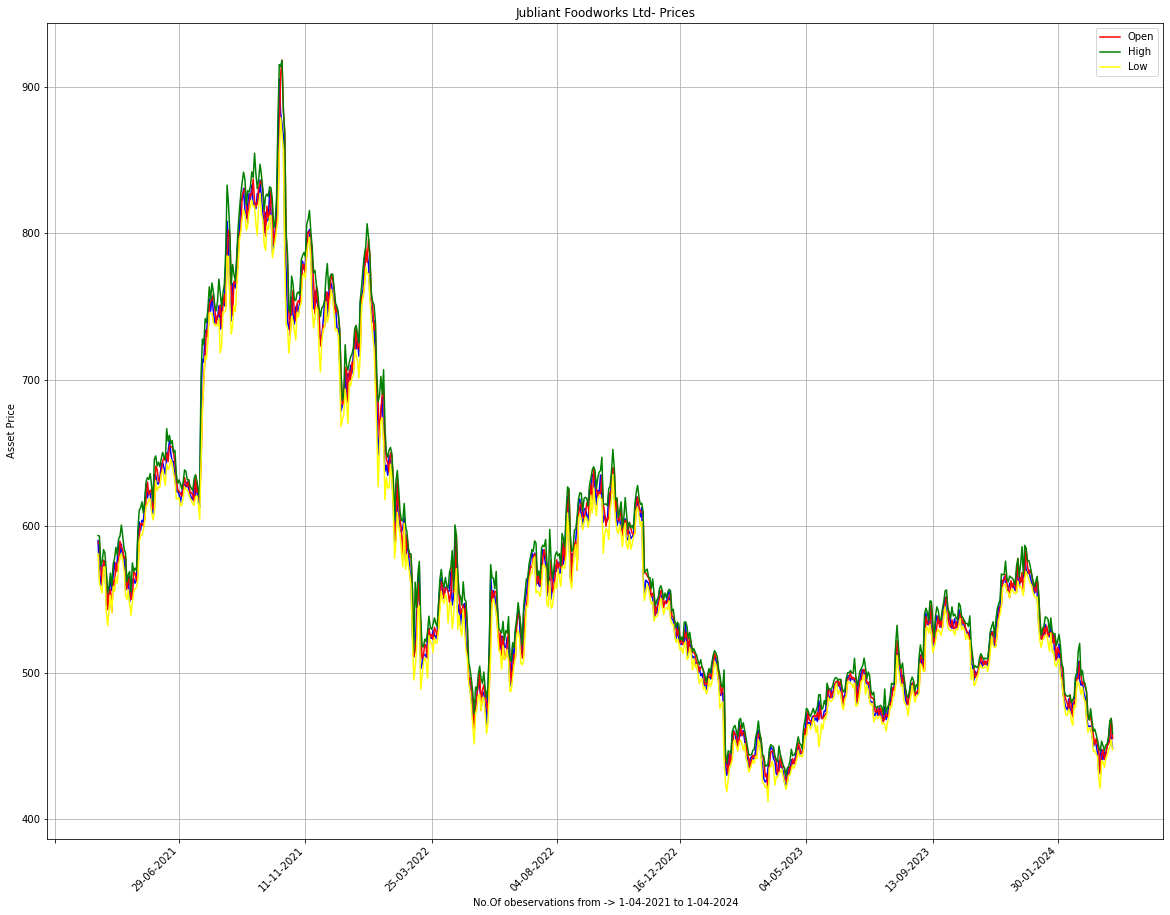

In [12]:
plt.plot(df['Date'].to_numpy(), df['Close'].to_numpy(), color='blue')
df['Open'].plot(color='red',figsize=(20,15),legend=True,grid=True)
#df['ClosePrice'].plot(color='blue',figsize=(20,15),legend=True,grid=True)
df['High'].plot(color='green',figsize=(20,15),legend=True,grid=True)
df['Low'].plot(color='yellow',figsize=(20,15),legend=True,grid=True)
#df['AverageP'].plot(color='brown',figsize=(20,15),legend=True,grid=True)
plt.ylabel('Asset Price')
plt.xlabel('No.Of obeservations from -> 1-04-2021 to 1-04-2024')
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))
plt.xticks(rotation=45, ha='right') 
plt.title('Jubliant Foodworks Ltd- Prices')

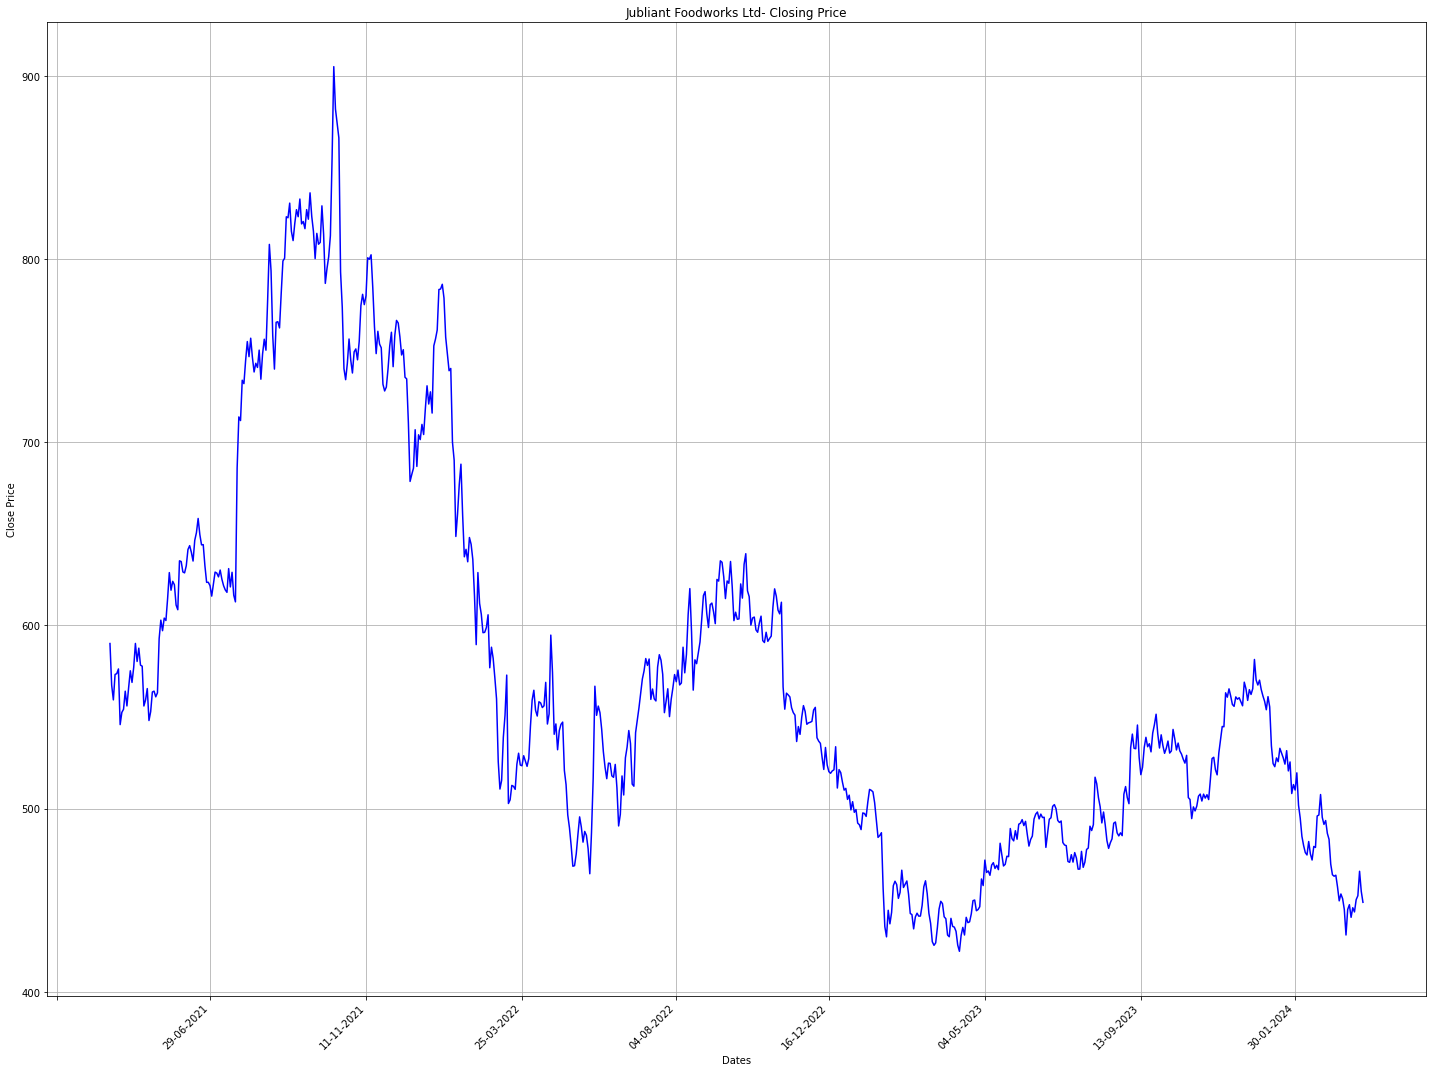

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 15))
plt.plot(df['Date'].to_numpy(), df['Close'].to_numpy(), color='blue')
#plt.plot(df['Date'],df['TurnoverInRs'],color='green')

plt.xlabel('Dates')
plt.ylabel('Close Price')
plt.title('Jubliant Foodworks Ltd- Closing Price')
plt.grid(True)

plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))# ticker is for 3 months
plt.xticks(rotation=45, ha='right')

plt.tight_layout() 
plt.show()


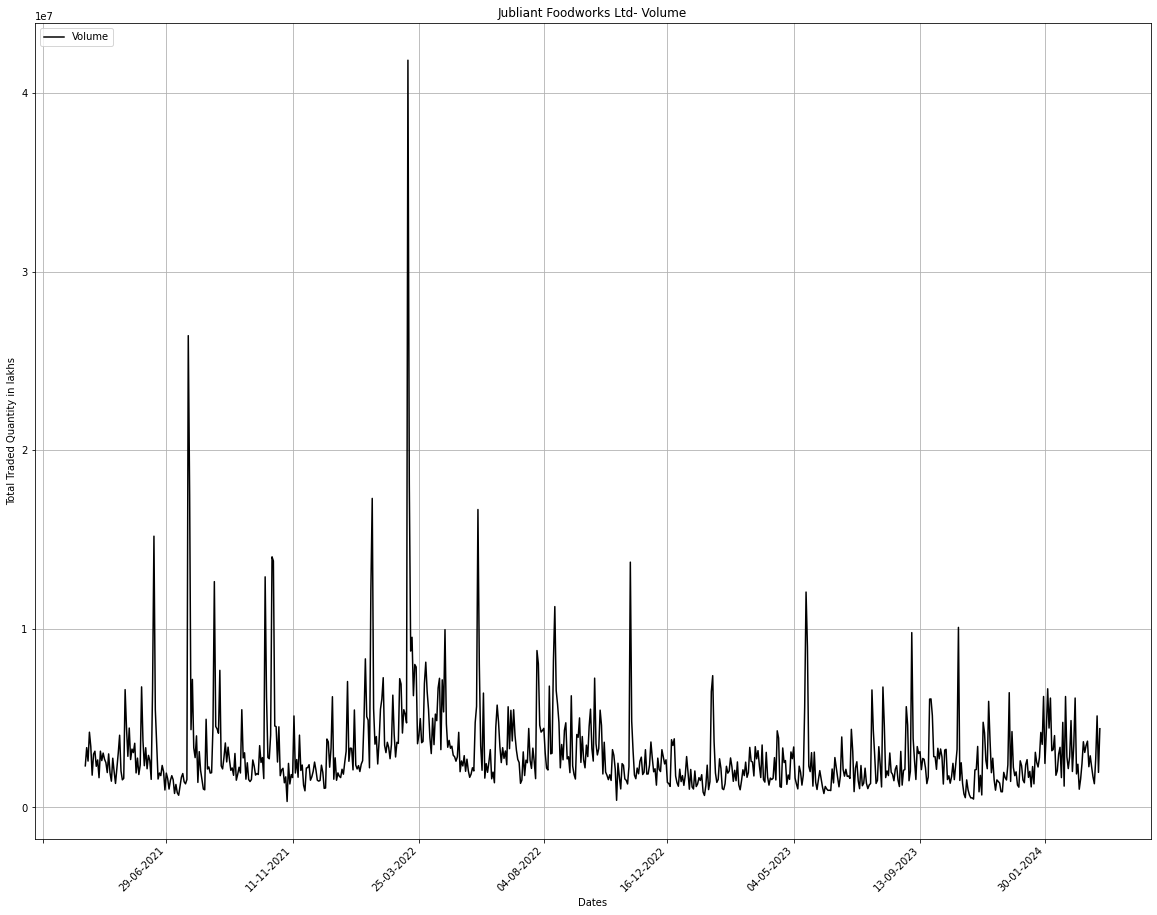

In [14]:
#df['TotalTradedQuantity'].plot(color='black',figsize=(20,9),legend=True,grid=True)
plt.figure(figsize=(20, 15))
plt.plot(df['Date'].to_numpy(), df['Volume'].to_numpy(), color='black',label='Volume')
plt.xlabel('Dates')
plt.ylabel('Total Traded Quantity in lakhs')
plt.grid(True)
plt.title('Jubliant Foodworks Ltd- Volume')
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))# ticker is for 3 months
plt.xticks(rotation=45, ha='right')
plt.legend(loc='upper left')
plt.show()

In [15]:
df['TurnoverInRs'] = df['Close']*df['Volume']

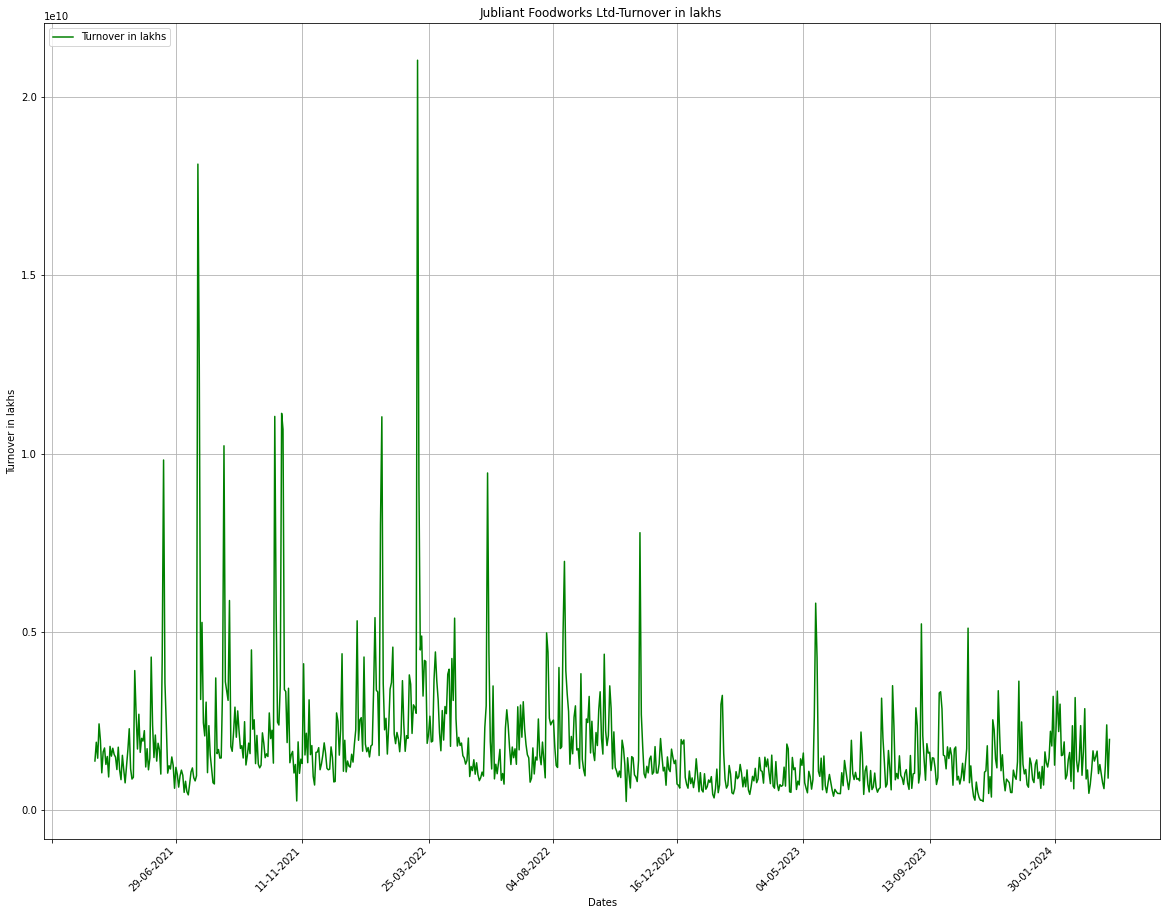

In [16]:
plt.figure(figsize=(20, 15))
plt.plot(df['Date'].to_numpy(),df['TurnoverInRs'].to_numpy(),color='green',label='Turnover in lakhs')

plt.xlabel('Dates')
plt.ylabel('Turnover in lakhs')
plt.grid(True)
plt.title('Jubliant Foodworks Ltd-Turnover in lakhs ')
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))# ticker is for 3 months
plt.xticks(rotation=45, ha='right')
plt.legend(loc='upper left')
plt.show()

# Charts 2) Bar

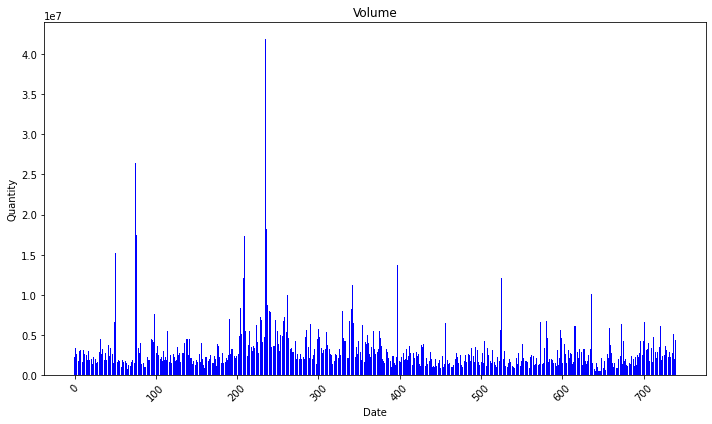

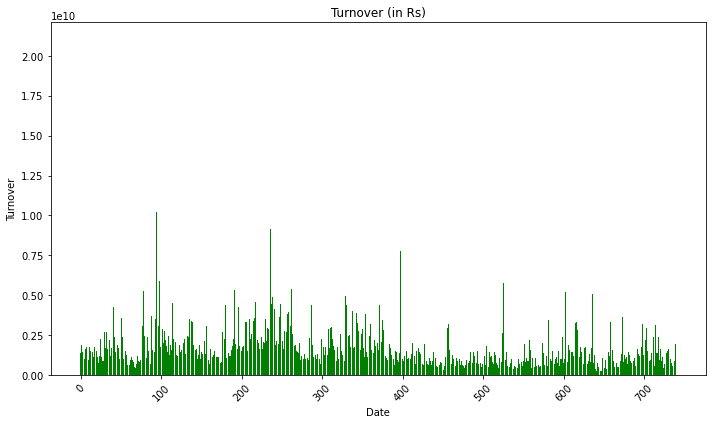

In [17]:
#bar charts for traded quantity, number of trades and turnover
import matplotlib.pyplot as plt

#traded quantity
plt.figure(figsize=(10, 6))
plt.bar(df.index, df['Volume'], color='blue')
plt.title('Volume')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#turnover
plt.figure(figsize=(10, 6))
plt.bar(df.index, df['TurnoverInRs'], color='green')
plt.title('Turnover (in Rs)')
plt.xlabel('Date')
plt.ylabel('Turnover')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Charts 3) Candlestick and Bollinger Bands with mplfinance

#bollinger: 

Volatility Measurement: Bollinger Bands expand and contract based on market volatility. During periods of high volatility, the bands widen, and during periods of low volatility, the bands contract.
Trend Identification: Bollinger Bands can help identify trends in the market. When prices consistently touch or exceed one of the bands, it may indicate a strong trend in that direction.
Reversal Signals: The crossing of the price over one of the bands can sometimes signal a potential reversal in the trend. For example, if the price crosses above the upper band, it may indicate an overbought condition and a potential reversal to the downside.

#candlestick:

Visual Representation of Price Movements: Candlestick charts provide a visual representation of price movements, making it easier for traders to interpret market sentiment and identify trends.
Pattern Recognition: Candlestick patterns, formed by the arrangement of multiple candlesticks, can indicate potential trend reversals, continuations, or market indecision. Common candlestick patterns include doji, hammer, engulfing, and shooting star, among others.
Time Period: Each candlestick represents a specific time period, such as one day, one hour, or one minute, depending on the chosen time frame.
Volume: Some candlestick charts also include a volume histogram below the price chart, showing the trading volume for each time period. High trading volume during certain candlestick patterns can provide additional confirmation of price movements.
Support and Resistance Levels: The highs and lows of candlesticks can be used to identify potential support and resistance levels in the market. Support levels are price levels where buying pressure may outweigh selling pressure, while resistance levels are price levels where selling pressure may outweigh buying pressure.

In [18]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
df.set_index('Date', inplace=True)


In [19]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,TurnoverInRs
Date,,,,,,,
2021-04-01,588.989990,593.599976,581.239990,590.150024,586.482910,2328705,1.374285e+09
2021-04-05,587.809998,593.250000,561.510010,567.400024,563.874207,3348860,1.900143e+09
2021-04-06,570.799988,572.809998,557.200012,559.380005,555.904053,2596305,1.452321e+09
2021-04-07,560.049988,576.000000,554.440002,573.280029,569.717712,4213170,2.415326e+09
2021-04-08,576.799988,584.000000,572.000000,573.700012,570.135071,3408280,1.955330e+09


C:\Users\ashok\anaconda3\lib\site-packages\mplfinance\_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


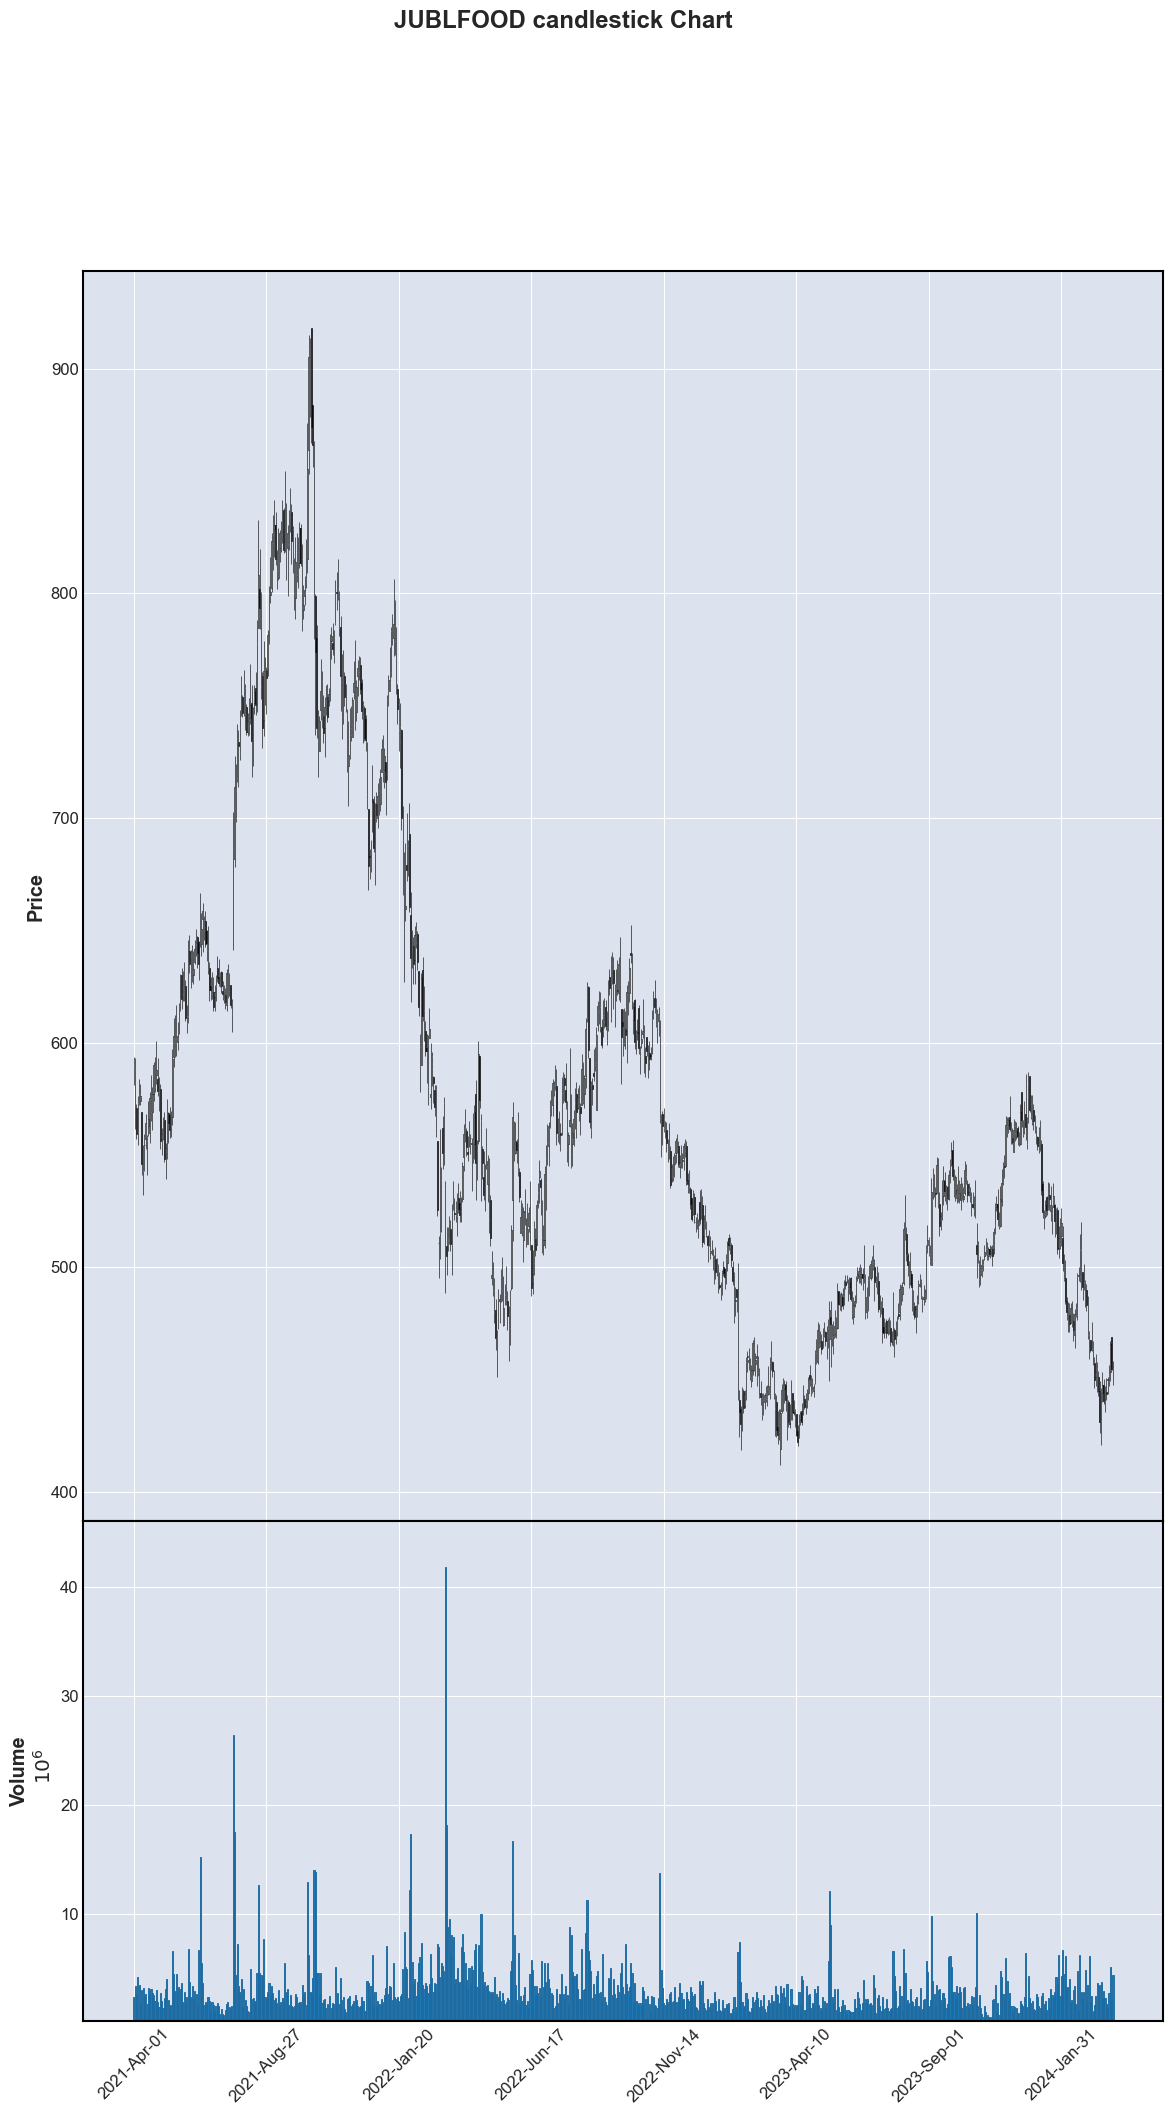

In [20]:
#andleStick

df_plot = df[['Open', 'High', 'Low', 'Close', 'Volume']]

# rename for mpl
df_plot.columns = ['Open', 'High', 'Low', 'Close', 'Volume']
df_plot.index = pd.to_datetime(df_plot.index)


mpf.plot(df_plot, type='candle', style='default', title='JUBLFOOD candlestick Chart', ylabel='Price', ylabel_lower='Volume', volume=True,figsize=(15,25))


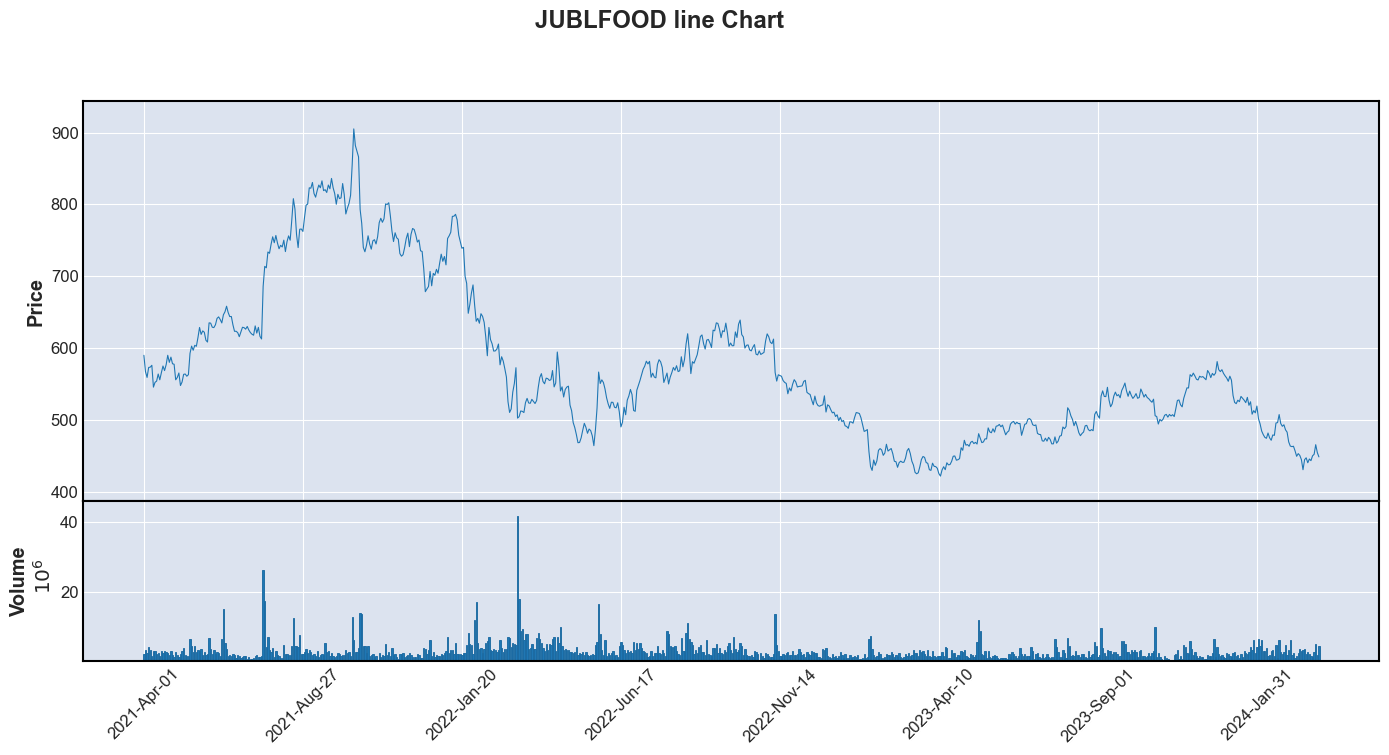

In [21]:
#line

df_plot = df[['Open', 'High', 'Low', 'Close', 'Volume']]

# rename for mpl
df_plot.columns = ['Open', 'High', 'Low', 'Close', 'Volume']
df_plot.index = pd.to_datetime(df_plot.index)


mpf.plot(df_plot, type='line', style='default', title='JUBLFOOD line Chart', ylabel='Price', ylabel_lower='Volume', volume=True,figsize=(18,8))


Text(0.5, 1.0, 'Bollinger Bands')

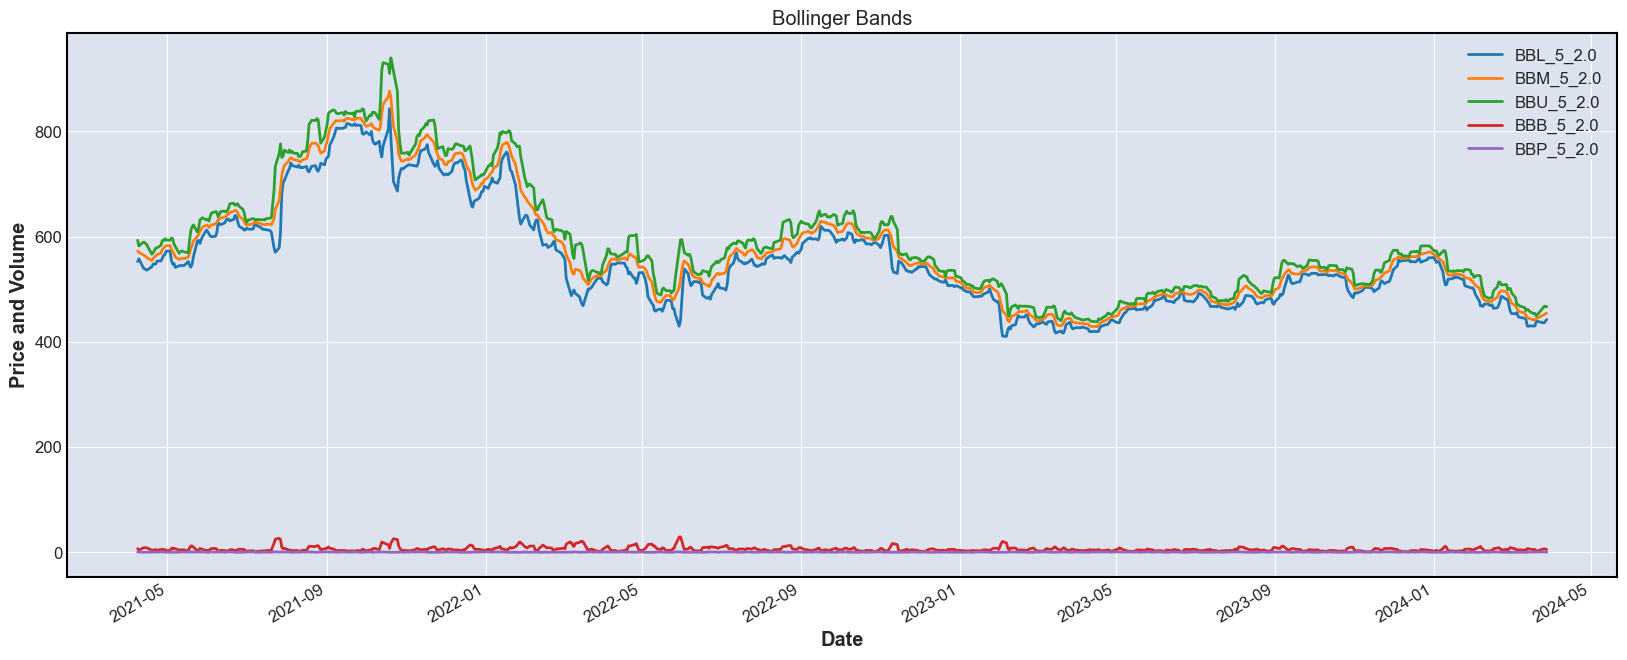

In [22]:
# Charts for BollingerBands
my_bbands = ta.bbands(df.Close, length=5, std=2.0);my_bbands.plot(figsize=(20,8))
plt.ylabel('Price and Volume')
plt.title('Bollinger Bands')

# Chart 3) Point and Figure


 A P&F chart records price movements in discrete columns of X's (for rising prices) and O's 
    (for falling prices). Each column represents a specific price range, and the X's and O's are plotted 
    based on price movements beyond a certain threshold, known as the box size

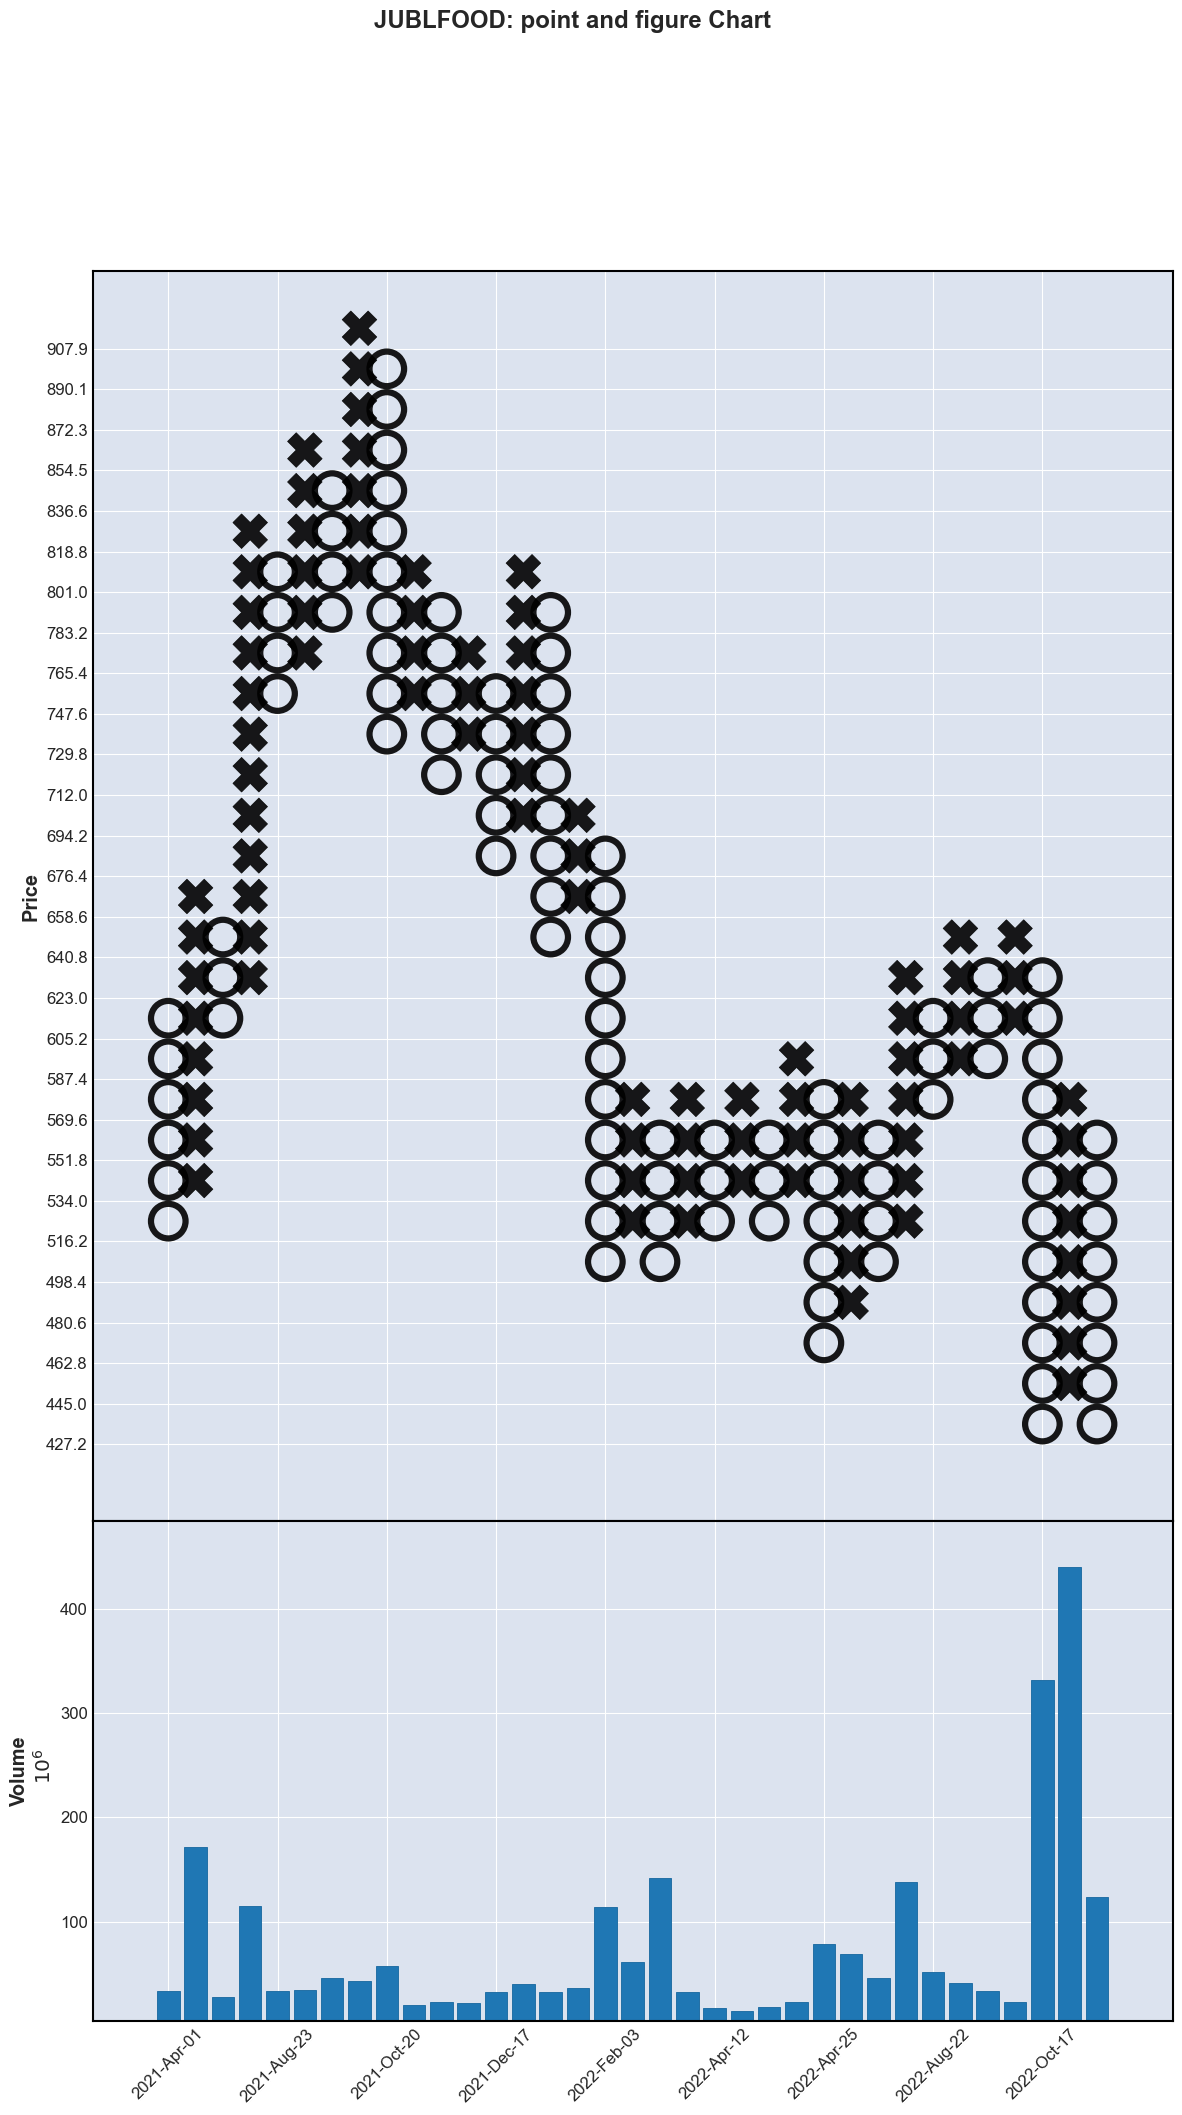

In [23]:
#candleStick

df_plot = df[['Open', 'High', 'Low', 'Close', 'Volume']]

# rename for mpl
df_plot.columns = ['Open', 'High', 'Low', 'Close', 'Volume']
df_plot.index = pd.to_datetime(df_plot.index)


mpf.plot(df_plot, type='pnf', style='default', title='JUBLFOOD: point and figure Chart', ylabel='Price', ylabel_lower='Volume', volume=True,figsize=(15,25))


# Random Walk and Dow Theory

The market has three trends:

Primary Trend: This is the long-term trend that lasts for more than a year, typically referred to as the bull market (upward trend) or bear market (downward trend).

Secondary Trend: This is a shorter-term trend that moves counter to the primary trend, typically lasting from three weeks to three months. It's often considered a correction within the primary trend.

Minor Trend: This is the short-term fluctuations within the secondary trend, typically lasting less than three weeks.
The market discounts everything: This tenet suggests that all information, including fundamental factors, economic conditions, and market psychology, is reflected in the price of a security.

Stock market averages must confirm each other: According to Dow Theory, a significant trend reversal in the stock market should be confirmed by both the Dow Jones Industrial Average (DJIA) and the Dow Jones Transportation Average (DJTA). If one average reaches a new high or low that is not confirmed by the other average, it may signal a potential trend reversal.

Trends are confirmed by volume: Increases in trading volume typically confirm the strength of a trend. 

For example, rising prices accompanied by increasing volume suggest a strong uptrend, while falling prices with decreasing volume suggest a weakening trend.
Trends exist until definitive signals prove that they have ended: Dow Theory suggests that trends persist until there is clear evidence to the contrary. Traders should not assume that a trend has ended until there is confirmation through price action and volume.

The averages discount everything: This tenet reiterates the second tenet, emphasizing that market averages reflect all available information, including both fundamental and technical factors.

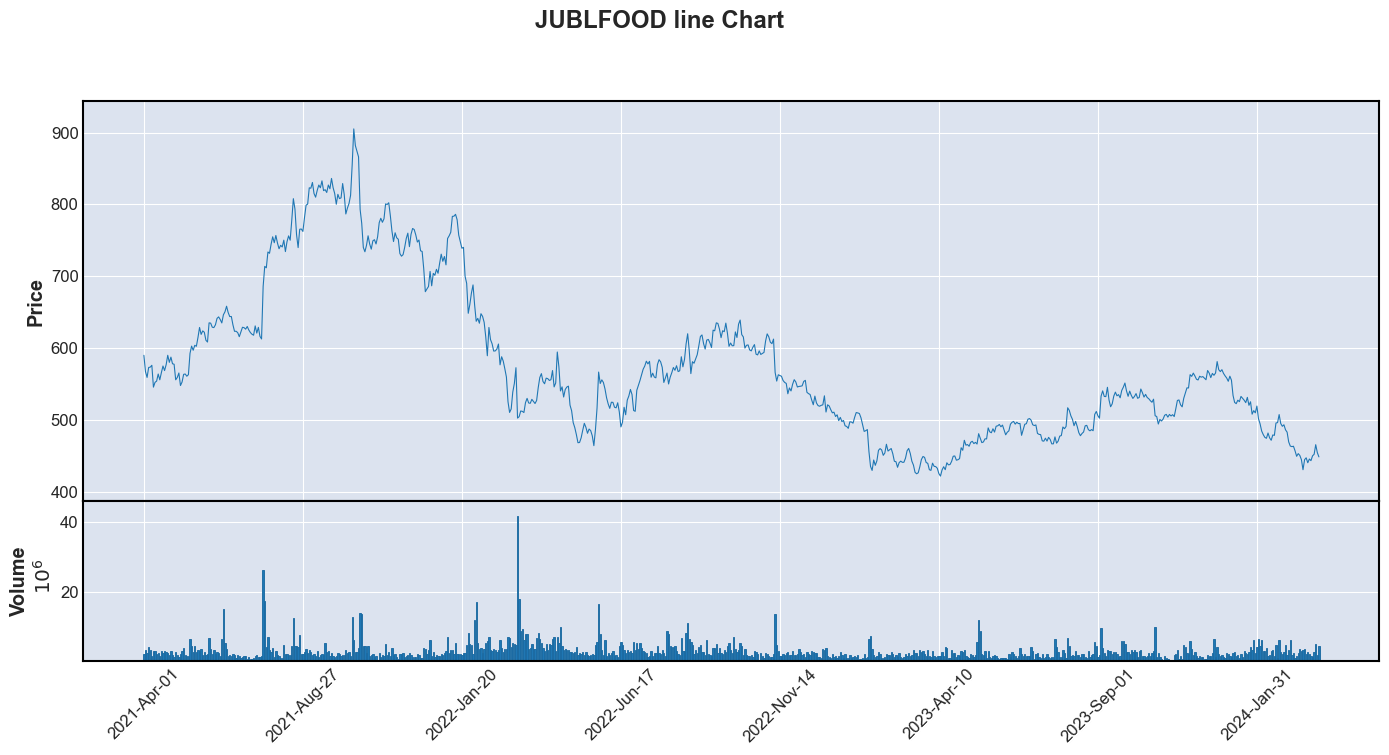

In [24]:
# line graph with closing price and volume

df_plot = df[['Open', 'High', 'Low', 'Close', 'Volume']]

# rename for mpl
df_plot.columns = ['Open', 'High', 'Low', 'Close', 'Volume']
df_plot.index = pd.to_datetime(df_plot.index)


mpf.plot(df_plot, type='line', style='default', title='JUBLFOOD line Chart', ylabel='Price', ylabel_lower='Volume', volume=True,figsize=(18,8))


# Dow Jones Theory

1. **Dow Jones Theory**:
   - Named after Charles Dow (co-founder of Dow Jones & Company), the theory is a cornerstone of technical analysis.
   - It asserts that market movements are **not random** but follow **identifiable trends and patterns**.
   - Dow believed that analyzing the overall market could accurately gauge business conditions and predict significant market trends.

2. **Key Tenets of Dow Theory**:
   - **Market Discounts Everything**:
     - The theory operates on the **efficient market hypothesis (EMH)**, which says that asset prices incorporate all available information.
     - Even future events are discounted in the form of risk.
   - **Price Movements Comprise Three Main Trends**:
     - **Primary Trend**: The long-term direction of the market (bullish or bearish).
     - **Secondary Trend**: Corrections within the primary trend.
     - **Minor Trend**: Short-term fluctuations.
   - **Confirmation by Multiple Indices**:
     - Different market indices (e.g., Dow Jones Industrial Average, Transportation Average) must confirm each other in terms of price action and volume patterns.
     - Trends should be consistent across indices.
   - **Volume Confirmation**:
     - Volume should increase during the primary trend and decrease during corrections.
   - **Divergence Warnings**:
     - Divergence between indices can signal potential trend reversals.
   - **Trends Persist Until Reversal Signals**:
     - Trends continue until clear reversal signals occur.

3. **Application in Technical Analysis**:
   - **Identifying Trends**:
     - Dow Theory helps traders identify the overall trend (bullish or bearish).
     - By analyzing price movements and volume, they can make informed decisions.
   - **Confirmation Signals**:
     - When one index (e.g., DJIA) reaches an important high, traders watch for confirmation from another corresponding index (e.g., DJTA).
     - Confirming trends help validate investment decisions.
   - **Risk Management**:
     - Understanding trends helps manage risk.
     - Traders can adjust positions based on primary and secondary trends.

In summary, Dow Theory provides a framework for understanding market behavior and making strategic investment choices.

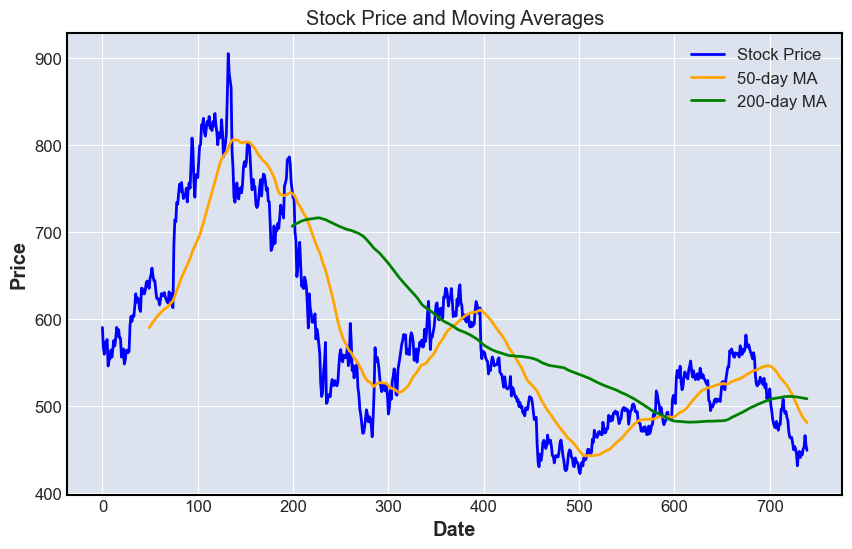

No Golden Cross
Death Cross: Bearish signal


In [25]:
# we then calculate 50-day and 200-day moving averages
data['50_MA'] = data['Close'].rolling(window=50).mean()
data['200_MA'] = data['Close'].rolling(window=200).mean()

# we the plot for the stock price and moving averages
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Close'], label='Stock Price', color='blue')
plt.plot(data.index, data['50_MA'], label='50-day MA', color='orange')
plt.plot(data.index, data['200_MA'], label='200-day MA', color='green')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Stock Price and Moving Averages')
plt.legend()
plt.grid(True)
plt.show()

# we then check for Dow Theory signals
# If 50-day MA crosses above 200-day MA, it's a bullish signal (Golden Cross)
if data['50_MA'].iloc[-1] > data['200_MA'].iloc[-1]:
    print("Golden Cross: Bullish signal")
else:
    print("No Golden Cross")

# If 50-day MA crosses below 200-day MA, it's a bearish signal (Death Cross)
if data['50_MA'].iloc[-1] < data['200_MA'].iloc[-1]:
    print("Death Cross: Bearish signal")
else:
    print("No Death Cross")


 ### Explaination of the Graph and Interpretation in detail

1. **Graph Description:**
   - The graph displays stock price data along with two moving averages: a 50-day moving average (50-MA) and a 200-day moving average (200-MA).
   - The blue line represents the actual stock prices.
   - The orange line corresponds to the 50-day moving average.
   - The green line represents the 200-day moving average.
   - The horizontal axis represents the date, and the vertical axis represents the stock price.
   - The title of the graph is "Stock Price and Moving Averages."

2. **Dow Jones Theory:**
   - The Dow Jones Theory is a technical analysis approach that examines moving average crossovers to identify potential bullish or bearish signals.

3. **Interpretation:**
   - **Golden Cross (Bullish Signal):**
     - A Golden Cross occurs when the 50-day MA crosses above the 200-day MA.
     - It suggests a potential bullish trend reversal.
     - Investors might consider this a favorable time to buy.
     - Check if the 50-day MA is currently above the 200-day MA:
       - If true, print "Golden Cross: Bullish signal."
       - Otherwise, print "No Golden Cross."

   - **Death Cross (Bearish Signal):**
     - A Death Cross occurs when the 50-day MA crosses below the 200-day MA.
     - It indicates a potential bearish trend reversal.
     - Investors might consider this a warning to sell.
     - Check if the 50-day MA is currently below the 200-day MA:
       - If true, print "Death Cross: Bearish signal."
       - Otherwise, print "No Death Cross."

4. **It Says Death Cross**
   - The Death Cross is considered significant because it reflects a longer-term trend change.

5. **Why Is It Called a “Death Cross”?**
   - The term “Death Cross” sounds ominous, but it’s simply a descriptive name for this technical pattern.
   - The crossing of moving averages resembles an “X” shape, with the 50-MA crossing below the 200-MA, which can be associated with a negative outcome.

6. **Implications:**
   - Traders and investors pay attention to the Death Cross because it may indicate a shift in market sentiment.
   - It could lead to increased selling pressure and potential price declines.

7. **Caveats:**
   - Not all Death Crosses lead to prolonged bear markets or significant declines.
   - False signals can occur, especially during volatile periods.

# Random Walk Theory

1. **What Is Random Walk Theory?**
   - **Random Walk Theory** suggests that changes in asset prices (such as stock prices) are **random**.
   - In other words, stock prices move **unpredictably**, and past prices **cannot accurately predict future prices**.
   - The theory also implies that the stock market is **efficient** and reflects all available information¹.

2. **Key Points**:
   - **Efficient Market Hypothesis (EMH)**: Random walk theory aligns with the EMH, which assumes that asset prices incorporate all available information.
   - **Quick Adjustment to New Information**: Stock prices adjust rapidly to new information, making it impossible to act on it.
   - **Consistent Underperformance**: Trying to time the market or predict stock prices using fundamental or technical analysis is often futile.
   - **Diversified Portfolio Strategy**: Random walk theory suggests that buying and holding a diversified portfolio may be the best long-term investment approach.

3. **Burton Malkiel's Influence**:
   - Economist Burton Malkiel popularized random walk theory in his 1973 book, *A Random Walk Down Wall Street*.
   - He argued that attempting to beat the market or predict stock prices using analysis is a waste of time.
   - Instead, he advocated for a simple strategy: **buy and hold a broad index fund**.

4. **Criticism and Acceptance**:
   - While critics believe there are ways to predict stock prices, random walk theory remains widely accepted.
   - By accepting stock price unpredictability, investors can focus on long-term planning and avoid rash decisions based on short-term market movements.

In summary, random walk theory reminds us to remain disciplined, patient, and focused on long-term investment goals.

C:\Users\ashok\AppData\Local\Temp/ipykernel_2680/972904096.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_df['Daily_Returns'] = stock_df['Close'].pct_change()


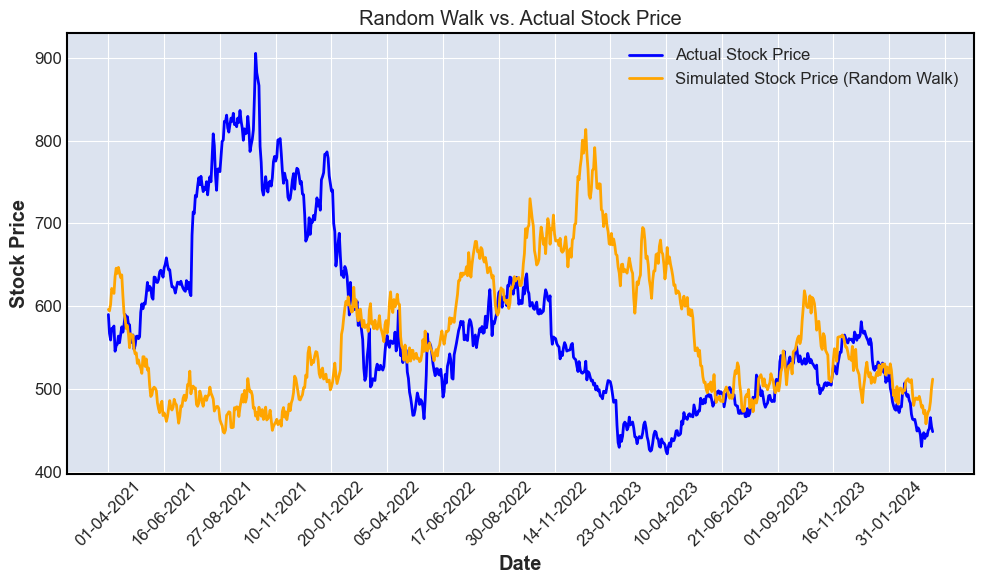

Daily Volatility (Standard Deviation): 0.0202
Annualized Volatility: 0.3203


In [26]:
stock_df = data[['Date', 'Close']]
stock_df.set_index('Date', inplace=True)

# First we calculate the daily returns
stock_df['Daily_Returns'] = stock_df['Close'].pct_change()

# Then we generate a random walk for simulated stock price
np.random.seed(42) 
n_days = len(stock_df)
daily_returns = np.random.normal(0, stock_df['Daily_Returns'].std(), n_days)
cumulative_returns = np.cumsum(daily_returns)
simulated_prices = stock_df['Close'].iloc[0] * np.exp(cumulative_returns)


simulated_df = pd.DataFrame({'Date': stock_df.index, 'Simulated_Price': simulated_prices})

# Plot the actual stock price and the simulated stock price
plt.figure(figsize=(10, 6))
plt.plot(stock_df.index, stock_df['Close'], label='Actual Stock Price', color='blue')
plt.plot(simulated_df['Date'], simulated_df['Simulated_Price'], label='Simulated Stock Price (Random Walk)', color='orange')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Random Walk vs. Actual Stock Price')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)  # Rotate x-axis labels 
plt.tight_layout()  
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(20)) 
plt.show()

# We also calculate the daily returns volatility by standard deviation
daily_volatility = np.std(daily_returns)
print(f"Daily Volatility (Standard Deviation): {daily_volatility:.4f}")

# and the annualized volatility is also calculated
annual_volatility = daily_volatility * np.sqrt(252)
print(f"Annualized Volatility: {annual_volatility:.4f}")


 ### Explaination of the Graph and Interpretation in detail
 

1. **Graph Overview**:
   - The graph compares the actual stock price (in blue) with a simulated stock price based on the random walk theory (in orange).
   - Both lines represent the stock price over time.
   - The x-axis shows dates, ranging from April 1, 2021, to March 31, 2024.
   - The y-axis represents stock price values, ranging approximately from 400 to 900 units.

2. **Actual Stock Price (Blue Line)**:
   - The blue line represents the real-world stock price.
   - Notable observations:
     - Sharp Peaks: There are several peaks where the stock price reaches its highest value. These peaks may correspond to positive news, strong financial performance, or market optimism.
     - Deep Troughs: The stock price experiences significant drops at certain points. These troughs could be due to negative news, poor earnings reports, or market pessimism.
     - Volatility: The blue line exhibits substantial volatility, indicating frequent price fluctuations. Investors and traders need to consider this volatility when making decisions.

3. **Simulated Stock Price (Orange Line)**:
   - The orange line represents the simulated stock price based on the random walk model.
   - Key observations:
     - Smoother Trend: Unlike the actual stock price, the orange line appears smoother. This is because the random walk model assumes gradual, random changes in price.
     - Lack of Specific Events: The simulated price lacks the sharp peaks and troughs seen in the actual data. This aligns with the random walk theory, which assumes no specific events driving stock price movements.
     - Randomness: The orange line reflects randomness inherent in the model. It doesn't capture external factors like company news, economic events, or investor sentiment.

4. **Comparing Both Lines**:
   - Divergence: The two lines diverge significantly. This divergence highlights the limitations of the random walk model in capturing real-world complexities.
   - Market Efficiency: The random walk theory suggests that stock prices fully reflect all available information. However, the actual stock price's deviations from the simulated price challenge this efficiency assumption.

5. **Volatility and Risk**:
   - Both lines exhibit volatility, but the actual stock price's volatility is more pronounced.
   - Investors should consider risk when interpreting these lines. Higher volatility implies greater risk but also potential rewards.

**Interpreting the daily volatility (standard deviation) and annualized volatility**

1. **Daily Volatility (Standard Deviation)**:
   - The daily volatility represents the average magnitude of price fluctuations in the stock on a daily basis.
   - In this case, the calculated daily volatility is approximately **0.0202**.
   - A higher daily volatility indicates greater price variability, which can be associated with riskier investments.
   - Investors and traders often use volatility as a measure of risk. Higher volatility may lead to larger potential gains but also larger potential losses.

2. **Annualized Volatility**:
   - The annualized volatility is an estimate of how much the stock's price might vary over a year, assuming similar daily fluctuations.
   - It is calculated by multiplying the daily volatility by the square root of the number of trading days in a year (usually 252).
   - In this case, the annualized volatility is approximately **0.3203**.
   - A higher annualized volatility suggests that the stock price is expected to exhibit larger swings over the course of a year.

3. **Interpretation**:
   - The provided volatility values indicate that the stock (or simulated stock in this case) experiences moderate volatility.
   - Investors and analysts often consider volatility when making investment decisions. A stock with low volatility may be more stable but potentially less rewarding, while a highly volatile stock may offer greater profit opportunities but also higher risks.

# SARIMAX Predictions, Trend and a Scalping Algorithm


In [27]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       740 non-null    object 
 1   Open       740 non-null    float64
 2   High       740 non-null    float64
 3   Low        740 non-null    float64
 4   Close      740 non-null    float64
 5   Adj Close  740 non-null    float64
 6   Volume     740 non-null    int64  
 7   50_MA      691 non-null    float64
 8   200_MA     541 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 52.2+ KB


In [28]:
data.head(3)

,Date,Open,High,Low,Close,Adj Close,Volume,50_MA,200_MA
0,01-04-2021,588.989990,593.599976,581.239990,590.150024,586.482910,2328705,NaN,NaN
1,05-04-2021,587.809998,593.250000,561.510010,567.400024,563.874207,3348860,NaN,NaN
2,06-04-2021,570.799988,572.809998,557.200012,559.380005,555.904053,2596305,NaN,NaN


In [29]:
#for the predictions, let us add some indicators. I'll be adding RSI, EMA and VWAP(Volume weighted average Price)

data['Closee'] = (data['High']+data['Low']+data['Close'])/3
data['RSI'] = ta.rsi(data.Close, length=15)  # RSI (relative strength index)
data['EMAF'] = ta.ema(data.Close, length=20)  # fast moving avg
data['EMAM'] = ta.ema(data.Close, length=100)  # medium moving avg
data['EMAS'] = ta.ema(data.Close, length=150)  # slow moving avg
data['vwap'] = (data.Volume * data.Closee).cumsum() / data.Volume.cumsum()
data['target'] = data['Close'].shift(-1)  # C(t) = C(t-1) + diff(t)
data.dropna(inplace=True)
#data.reset_index(inplace=True)
data = data.drop(['Volume', 'Close','Closee','Date','Adj Close'], axis=1)


In [30]:
data.head(3) #used to predict now

,Open,High,Low,50_MA,200_MA,RSI,EMAF,EMAM,EMAS,vwap,target
199,757.440002,759.799988,742.000000,744.274799,706.577049,50.885102,748.251878,741.407153,717.764807,713.652737,739.109985
200,750.780029,753.340027,730.020020,743.553198,707.321849,48.104770,747.381221,741.361665,718.047524,713.741100,740.340027
201,734.000000,751.179993,722.200012,742.759799,708.186549,48.508240,746.710631,741.341434,718.342789,713.835409,700.130005


In [31]:
#pip install pmdarima

In [32]:
#lets predict for last month, that is for last 30 days 
from pmdarima.arima import auto_arima
X_SARIMAX = data.drop(['target'], axis=1)
y_SARIMAX = data['target']
train_y = y_SARIMAX.iloc[:-31]
test_y = y_SARIMAX.iloc[-31:]
train_X = X_SARIMAX.iloc[:-31]
test_X = X_SARIMAX.iloc[-31:]

model_SARIMAX = auto_arima(y=train_y, X=train_X, seasonal=True, m=7) #7 cus, daily data so weekly seasonalities
predictions_SARIMAX = pd.Series(model_SARIMAX.predict(n_periods=31, X=test_X))
    
predictions_SARIMAX.index = test_y.index
df_cp = pd.DataFrame(predictions_SARIMAX, columns=['JUBLFOOD'])

C:\Users\ashok\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\ashok\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


<AxesSubplot:>

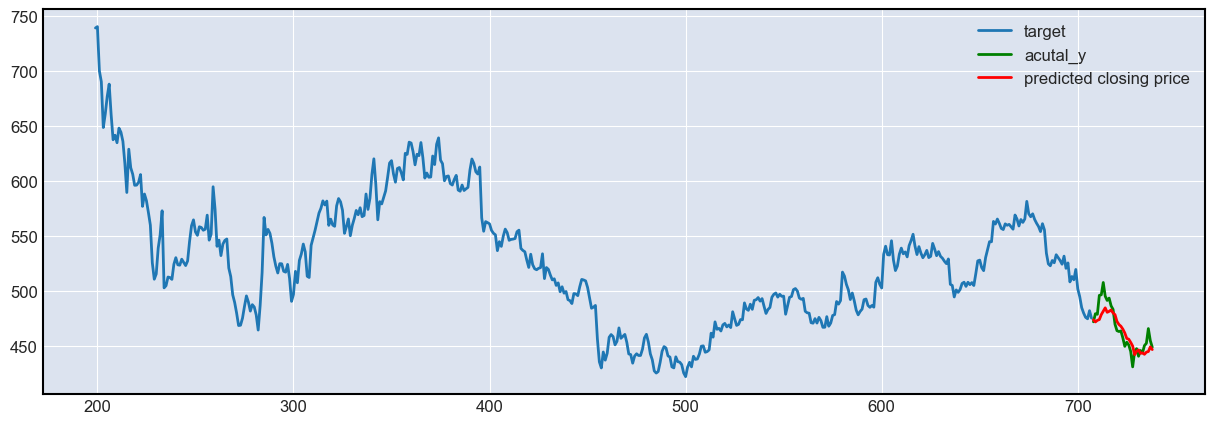

In [33]:
train_y.plot(figsize = (15,5), legend = True)
test_y.plot(color='green',label='acutal_y',legend = True)
predictions_SARIMAX.plot(color='red',label='predicted closing price',legend=True)
#pred_SARIMAX.plot(color='red',label='closing price',legend=True)

<AxesSubplot:>

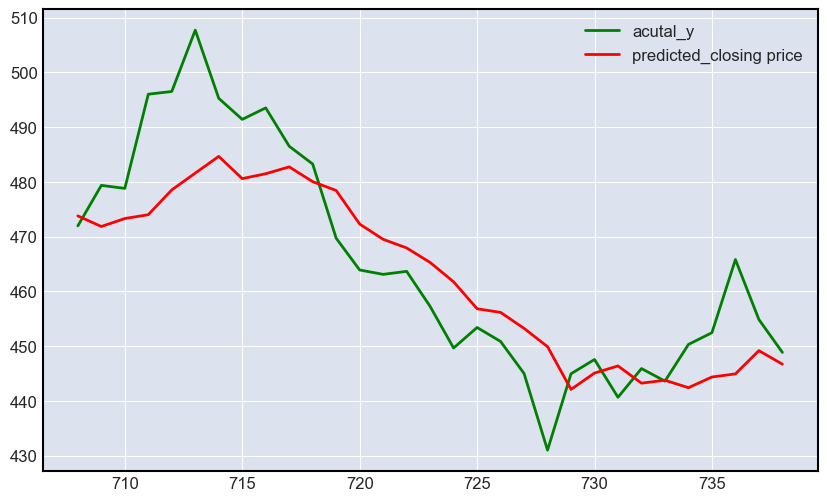

In [34]:
test_y.plot(color='green',label='acutal_y',legend = True,figsize=(10,6))
predictions_SARIMAX.plot(color='red',label='predicted_closing price',legend=True,figsize=(10,6))

In [35]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(predictions_SARIMAX,test_y))
#rmse=sqrt(mean_squared_error(pred_SARIMAX,test_y[0:31]))
print(rmse)

10.645812428082646


In [36]:
model_SARIMAX.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  509
Model:               SARIMAX(2, 0, 0)   Log Likelihood               -1935.719
Date:                Sat, 20 Apr 2024   AIC                           3899.437
Time:                        21:06:27   BIC                           3958.692
Sample:                             0   HQIC                          3922.671
                                - 509                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0301     29.223     -0.001      0.999     -57.306      57.246
Open          -0.0344      0.092     -0.374      0.709      -0.215       0.146
High          -0.1042      0.067     -1.545      0.122      -0.236       0.028
Low            0.1622      0.099      1.646      0.100      -0.031       0.355
50_MA         -0.0012      0.206     -0.006      0.995      -0.405       0.402
200_MA         0.0454      0.187      0.243      0.808      -0.321       0.412
RSI            0.4795      0.320      1.499      0.134      -0.148       1.107
EMAF           1.2013      0.113     10.638      0.000       0.980       1.423
EMAM          -1.0815      0.539     -2.007      0.045      -2.138      -0.025
EMAS           0.7704      0.605      1.274      0.203      -0.415       1.956
vwap          -0.0096      0.254     -0.038      0.970      -0.507       0.488
ar.L1          0.6582      0.113      5.843      0.000       0.437       0.879
ar.L2          0.0510      0.086      0.596      0.551      -0.117       0.219
sigma2       118.1662      5.093     23.204      0.000     108.185     128.147
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):               378.60
Prob(Q):                              0.87   Prob(JB):                         0.00
Heteroskedasticity (H):               0.28   Skew:                            -0.25
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.19
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [37]:
print(df_cp.head()) #These are the closing price predictions
print(len(df_cp))
print('actual closing prices:',test_y)

       JUBLFOOD
708  473.774478
709  471.841013
710  473.296149
711  473.996932
712  478.521398
31
actual closing prices: 708    471.950012
709    479.350006
710    478.799988
711    496.000000
712    496.500000
713    507.700012
714    495.250000
715    491.399994
716    493.500000
717    486.500000
718    483.250000
719    469.700012
720    463.899994
721    463.100006
722    463.649994
723    457.250000
724    449.649994
725    453.399994
726    450.850006
727    445.000000
728    431.000000
729    444.950012
730    447.549988
731    440.649994
732    445.899994
733    443.600006
734    450.299988
735    452.450012
736    465.799988
737    454.850006
738    448.850006
Name: target, dtype: float64


# Parameters

In [38]:
#pip install PyPortfolioOpt

In [40]:
from pypfopt.expected_returns import mean_historical_return
Mu = mean_historical_return(df_cp)/12
Muk = mean_historical_return(test_y[:-1])/12
from pypfopt.risk_models import CovarianceShrinkage
S = CovarianceShrinkage(df_cp).ledoit_wolf()

print('exp mean is %:',Mu*100, 'Standard deviation is:',S**0.5)

#we need to see a way to backtest our predictions in a way it matches the expected returns 

exp mean is %: JUBLFOOD   -3.249949
dtype: float64 Standard deviation is:           JUBLFOOD
JUBLFOOD  0.103689


C:\Users\ashok\anaconda3\lib\site-packages\pypfopt\expected_returns.py:137: RuntimeWarning: prices are not in a dataframe
  warnings.warn("prices are not in a dataframe", RuntimeWarning)


# Trend using 9ema (Predictions vs Actuals)


['downward trend'] JUBLFOOD 4.0


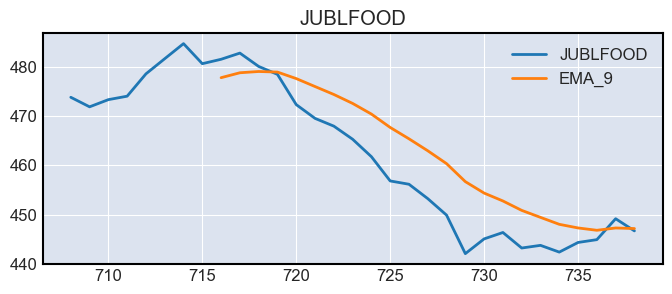

In [41]:
#The 9 EMA strategy generates buy signals when the price moves above the 9 EMA line and sell signals when the price moves below the indicator

#from the prediction made of the closing price we figure out the trend for the month. 
for k in df_cp.columns:
    up=(df_cp[k]>ta.ema(df_cp[k],length=9))
    down=(df_cp[k]<ta.ema(df_cp[k],length=9))
    df_cp.loc[up,'trend']=1
    df_cp.loc[down,'trend']=0
    directionn= df_cp.trend.sum()
    dirn=[]
    if directionn>=11:
        dirn.append('upward trend')
    else:
        dirn.append('downward trend')
    print( dirn,k,directionn)
    
for k in df_cp.columns[:-1]:
    plt.figure(figsize=(8, 3))
    plt.title(k)
    df_cp[k].plot(grid=True,legend=True)
    ema =ta.ema(df_cp[k],length=9);ema.plot(grid=True,legend=True)
    plt.show()

In [42]:
test_yy = test_y.reset_index()

In [43]:
test_yy = test_yy.drop(['index'], axis=1);test_yy.head(2)

,target
0,471.950012
1,479.350006


['downward trend'] target 5.0


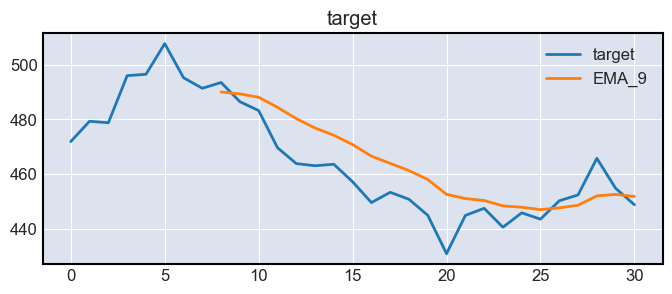

In [44]:


for k in test_yy.columns:
    up=(test_yy[k]>ta.ema(test_yy[k],length=9))
    down=(test_yy[k]<ta.ema(test_yy[k],length=9))
    test_yy.loc[up,'trend']=1
    test_yy.loc[down,'trend']=0
    directionn= test_yy.trend.sum()
    dirn=[]
    if directionn>=11:
        dirn.append('upward trend')
    else:
        dirn.append('downward trend')
    print( dirn,k,directionn)
    
for k in test_yy.columns[:-1]:
    plt.figure(figsize=(8, 3))
    plt.title(k)
    test_yy[k].plot(grid=True,legend=True)
    ema =ta.ema(test_yy[k],length=9);ema.plot(grid=True,legend=True)
    plt.show()
    
#this is the trend for the actual data of closing prices

# Scalp based on trend

#scalping is a strategy to buy and sell the same asset, several times a day to earn profits. Highly used by day traders who rely on
#technicial analysis instead of fundamentals

In [45]:
df.head(2)

,Open,High,Low,Close,Adj Close,Volume,TurnoverInRs
Date,,,,,,,
2021-04-01,588.989990,593.599976,581.23999,590.150024,586.482910,2328705,1.374285e+09
2021-04-05,587.809998,593.250000,561.51001,567.400024,563.874207,3348860,1.900143e+09


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 740 entries, 2021-04-01 to 2024-03-28
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          740 non-null    float64
 1   High          740 non-null    float64
 2   Low           740 non-null    float64
 3   Close         740 non-null    float64
 4   Adj Close     740 non-null    float64
 5   Volume        740 non-null    int64  
 6   TurnoverInRs  740 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 46.2 KB


In [47]:
df=df[-31:];df.head(2)

,Open,High,Low,Close,Adj Close,Volume,TurnoverInRs
Date,,,,,,,
2024-02-13,475.950012,479.500000,467.149994,471.950012,471.950012,2992024,1.412086e+09
2024-02-14,470.000000,481.549988,464.049988,479.350006,479.350006,3366103,1.613541e+09


In [48]:
df.tail(2)
#one month of data

,Open,High,Low,Close,Adj Close,Volume,TurnoverInRs
Date,,,,,,,
2024-03-27,468.799988,468.799988,454.149994,454.850006,454.850006,1962827,8.927919e+08
2024-03-28,455.000000,458.399994,447.350006,448.850006,448.850006,4408231,1.978635e+09


Text(0.5, 1.0, 'Jublifoods for the prev one month ')

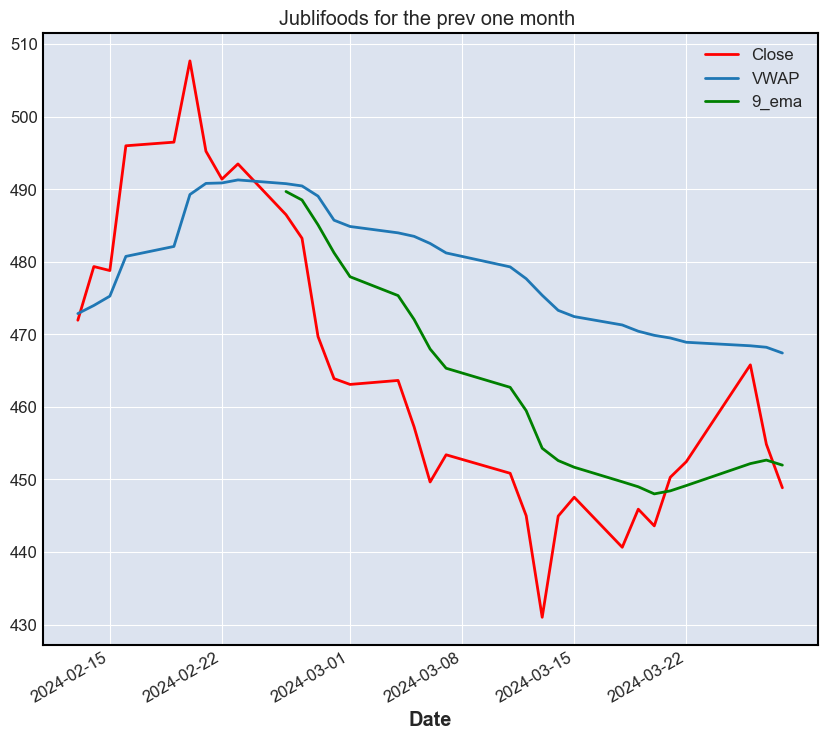

In [49]:
#vwap can tell if an asset is trading at a fair value or not. If price curve is below vwap, 
#asset is undervalued so they must converge, price and vwap
#tells you the optimal entry and exit points 
#vwap tells you much more than a MA

#RSI below 30 - buy and RSI above 70 sell signal

#The 9 EMA strategy generates buy signals when the price moves above the 9 EMA line and sell signals 
#when the price moves below the indicator. These signals can help traders identify potential breakouts and entry points for trades.

df['Closee'] = (df['High']+df['Low']+df['Close'])/3
df["VWAP"]=(df.Volume*df.Closee).cumsum()/df.Volume.cumsum()
df['RSI'] = ta.rsi(df.Close,length=14) 
df['9_ema']=ta.ema(df.Close,lenght=9)

df.Close.plot(color='red',grid = True, figsize=(10,9),legend=True)
df.VWAP.plot(figsize=(10,9),grid = True,legend=True)
df['9_ema'].plot(color='green',grid = True, figsize=(10,9),legend=True)
plt.title('Jublifoods for the prev one month ')

In [50]:
df

,Open,High,Low,Close,Adj Close,Volume,TurnoverInRs,Closee,VWAP,RSI,9_ema
Date,,,,,,,,,,,
2024-02-13,475.950012,479.500000,467.149994,471.950012,471.950012,2992024,1.412086e+09,472.866669,472.866669,NaN,NaN
2024-02-14,470.000000,481.549988,464.049988,479.350006,479.350006,3366103,1.613541e+09,474.983327,473.987265,NaN,NaN
2024-02-15,480.899994,484.000000,477.700012,478.799988,478.799988,1670215,7.996989e+08,480.166667,475.272826,NaN,NaN
2024-02-16,481.799988,497.600006,476.350006,496.000000,496.000000,4764205,2.363046e+09,489.983337,480.751320,NaN,NaN
2024-02-19,496.299988,499.899994,494.000000,496.500000,496.500000,1194042,5.928419e+08,496.799998,482.121404,NaN,NaN
2024-02-20,496.000000,515.000000,493.500000,507.700012,507.700012,6211416,3.153536e+09,505.400004,489.280184,NaN,NaN
2024-02-21,507.799988,520.000000,490.049988,495.250000,495.250000,2828412,1.400771e+09,501.766663,490.813940,NaN,NaN
2024-02-22,498.000000,498.000000,485.250000,491.399994,491.399994,2174922,1.068757e+09,491.549998,490.877463,NaN,NaN
2024-02-23,492.000000,501.500000,489.950012,493.500000,493.500000,2842158,1.402605e+09,494.983337,491.293586,NaN,NaN


In [51]:
# scalper

up = (df['Close'] > df['9_ema'])
down = (df['Close'] < df['9_ema']) 

df.loc[up, 'trend'] = 1
df.loc[down, 'trend'] = 0
direction= df.trend.sum()
trendd=[]
if direction>11:
    trendd.append('upward_trend')
else:
    trendd.append('downward_trend')

print(trendd)    

['downward_trend']


In [52]:
import pandas as pd

#signals
df['action'] = 'hold'  

sell_constraint = (df['Close'] > df['VWAP']) & (df['RSI'] > 70)#57


buy_constraint = (df['Close'] < df['VWAP']) & (df['RSI'] < 30)#48

df.loc[sell_constraint, 'action'] = 'sell'
df.loc[buy_constraint, 'action'] = 'buy'




initial_wealth = 100000

for trend in trendd:
    if trend=='upward_trend':
        initial_asset_units = round(initial_wealth/df['Close'].iloc[0])
        initial_wealth = initial_wealth-df['Close'].iloc[0]*initial_asset_units
    elif trend=='downward_trend':
        #initial_asset_units= 1
        initial_asset_units=- round(initial_wealth/df['Close'].iloc[0])#interchange for short
        initial_wealth = initial_wealth-df['Close'].iloc[0]*initial_asset_units

exp_price =  round(df_cp.median()) 
df['payoff'] = 0
df['position'] = 0


wealth = initial_wealth
asset_units = initial_asset_units

for index, row in df.iterrows():
    if row['action'] == 'buy' and row['Close'] <= exp_price.iloc[0] and row['Close'] <= wealth:
        df.at[index, 'payoff'] = -row['Close']  # pay for the asset
        df.at[index, 'position'] = 1  # asset held
        wealth =wealth- row['Close']  # reduce wealth
        asset_units = asset_units+1  # increase asset units
        
    elif row['action'] == 'sell' and asset_units > 0 and row['Close'] >= exp_price.iloc[0]: 
        df.at[index, 'payoff'] = row['Close']  # gain money from sale
        df.at[index, 'position'] = 0  # position is 0
        wealth = wealth+row['Close'] #increase wealth
        asset_units = asset_units-1 #reduce assets


#df['cumulative_payoff'] = df['payoff'].sum()
#df['returns'] = (initial_wealth + df['cumulative_payoff']) / (initial_wealth)
df
ret = ((wealth+asset_units*df['Close'].iloc[-1])/100000 -1)*100; print('returns fromt the trade is:',round(ret),'%')
print(ret)
print('predicted returns in %',Mu*100)
print('actual returns in %', mean_historical_return(test_y)/12*100)
# these are in negative as the market is at a downtrend!

returns fromt the trade is: 5 %
4.91810129600001
predicted returns in % JUBLFOOD   -3.249949
dtype: float64
actual returns in % target   -2.866413
dtype: float64


C:\Users\ashok\anaconda3\lib\site-packages\pypfopt\expected_returns.py:137: RuntimeWarning: prices are not in a dataframe
  warnings.warn("prices are not in a dataframe", RuntimeWarning)


In [54]:
df

,Open,High,Low,Close,Adj Close,Volume,TurnoverInRs,Closee,VWAP,RSI,9_ema,trend,action,payoff,position
Date,,,,,,,,,,,,,,,
2024-02-13,475.950012,479.500000,467.149994,471.950012,471.950012,2992024,1.412086e+09,472.866669,472.866669,NaN,NaN,NaN,hold,0,0
2024-02-14,470.000000,481.549988,464.049988,479.350006,479.350006,3366103,1.613541e+09,474.983327,473.987265,NaN,NaN,NaN,hold,0,0
2024-02-15,480.899994,484.000000,477.700012,478.799988,478.799988,1670215,7.996989e+08,480.166667,475.272826,NaN,NaN,NaN,hold,0,0
2024-02-16,481.799988,497.600006,476.350006,496.000000,496.000000,4764205,2.363046e+09,489.983337,480.751320,NaN,NaN,NaN,hold,0,0
2024-02-19,496.299988,499.899994,494.000000,496.500000,496.500000,1194042,5.928419e+08,496.799998,482.121404,NaN,NaN,NaN,hold,0,0
2024-02-20,496.000000,515.000000,493.500000,507.700012,507.700012,6211416,3.153536e+09,505.400004,489.280184,NaN,NaN,NaN,hold,0,0
2024-02-21,507.799988,520.000000,490.049988,495.250000,495.250000,2828412,1.400771e+09,501.766663,490.813940,NaN,NaN,NaN,hold,0,0
2024-02-22,498.000000,498.000000,485.250000,491.399994,491.399994,2174922,1.068757e+09,491.549998,490.877463,NaN,NaN,NaN,hold,0,0
2024-02-23,492.000000,501.500000,489.950012,493.500000,493.500000,2842158,1.402605e+09,494.983337,491.293586,NaN,NaN,NaN,hold,0,0


Final Analysis:

In this down trending market, the scalper will short. It has earned about 5% while the predicted returns is -3.25% and actuals is -2.867% (ignore the negative sign as we short in a down trending market and go long in an uptrending market, so there is profit either way.) 

In [ ]:
#END